# PSTAT135: Big Data Analytics Final Project

## Introduction
Voter participation is essential for the success of any democratic system. Strong democracies can only exist if the level of voter participation is high. With the increase in racial diversity in the US, the role of race in the US democratic system is drawing more attention from our policymakers in recent times. While we are aware that there is disparity in the levels of voter participation among different races, the different causes are not so clearly identified. Analysis of relevant data is an important step towards finding answers to such questions.

## The Voter Files
In the past, the availability of data was a bottleneck to finding answers to such questions. In recent times the amount of data has grown exponentially. Application of big-data techniques has become very important in dealing with such volumes of data. 

In this project, you will work with national voter file for the US. The voter files contain records for every registered voter in the US. A voter file exists for each state. Each file contains geographic, demographic, and household information. It also contains the history of voting for each registered voter.

### Data Contents
There were 726 columns of data before mostly empty columns have been removed. The accompanying [dictionary file](https://storage.googleapis.com/pstat135-data/voterfile/Voter%20File%20Format%20Source%20File%20Layout%2006-16-2020.xlsx) is useful for understanding the information contained in the file.

### Handling Data
- Many columns have missing data that will need to be handled appropriately
- Teams may want to split up the task and assign column sets to team members
- Files contain county and district level information
- FIPS codes should be used to uniquely identify counties across states
- The [uscounties.csv](https://storage.googleapis.com/pstat135-data/voterfile/uscounties.csv) file in the public bucket contains FIPS county codes by state

## How to Access the Voter File Data
The files have been preprocessed and loaded into BigQuery tables. Each state data is available as a separate table. For example, the table for Alaska, AK, can be found at this path:

```bash
pstat-135-235-spring-2025.voterfile.AK
```

To test, query this table from [BigQuery studio](https://console.cloud.google.com/bigquery) with the following SQL command:

```sql
SELECT count(*) FROM `pstat-135-235-spring-2025.voterfile.AK`
```

The description of the fields are available in the Excel file provided. The fields with with more than 95% missing values have been removed.

In the final project, you will be asked to use many of the tools learned in the class to interact with voter file.



## 1. Data in BigQuery

### 1.1. Connect BigQuery table in Databricks Catalog. 

Refer to Assignment 2 for tips. Provide a screenshot in your project submission.

### 1.2. Shell Script in Cloud Shell

Using an AI assistant of your choice, write a shell script to count how many rows are in each table. Use a bash array of state codes and programmatically query each table. 

```bash
states=(
    AK AL AR AZ CO CT DC DE GA HI
    IA ID IL IN KS KY LA MA MD ME 
    MI MN MO MS MT NC ND NE NH NJ 
    NM NV OH OK OR RI SC SD TN UT 
    VA VT WA WI WV WY
)
echo "### One state : ${states[1]}"
echo "### All states: ${states[@]}"
```

Run your shell script in Google Cloud Shell. Briefly explain your shell script and include the script in your project submission.  





result:![](/Workspace/Users/kaitiding@gmail.com/screenshot/1.2.1.png)
![](/Workspace/Users/kaitiding@gmail.com/screenshot/1.2.2.png)
![](/Workspace/Users/kaitiding@gmail.com/screenshot/1.2.3.png)
![](/Workspace/Users/kaitiding@gmail.com/screenshot/1.2.4.png)
![](/Workspace/Users/kaitiding@gmail.com/screenshot/1.2.5.png)
![](/Workspace/Users/kaitiding@gmail.com/screenshot/1.2.6.png)
![](/Workspace/Users/kaitiding@gmail.com/screenshot/1.2.7.png)




This shell script uses a bash array to store the list of US state codes. It iterates over each state code and uses the bq command-line tool to execute a BigQuery SQL query that counts the number of rows in each state’s voter file table. The result is printed for each state. This approach allows you to programmatically gather the row counts for all states efficiently.

### 1.3. Voter Turnout Query

Using BigQuery Studio, we will make SQL queries to identify the following information.

Voter turn out proportions in AK for general elections in years 2000 through 2018. We want to plot the result, so we want the years in a column rather than in column name. We might ask ChatGPT to write us an SQL query. The following was sufficient information about the data to write an accurate query:  

```
In table voterfile.AK, columns names such as General_2018 exist for every general election years from 2000 to 2018. Create a query to calculate voter turnout proportion for each year. Each row is an individual and the value Y indicate that individual voted. Format the final result to be two columns, year and turnout, sorted by year.
```

Write the resulting SQL query and screenshot of a visualization that shows the voter turnout over these years.

![](/Workspace/Users/kaitiding@gmail.com/screenshot/1.3.1.png)

### 1.3. BigQuery Notebook

Using BigQuery Notebook, execute the following command:  

```python
import bigframes.pandas as bf
df = bf.read_gbq("pstat-135-235-spring-2025.voterfile.AK")
df.head(20)
```

Which compute resource is the notebook running on? Which region? What do you learn with the "Open Job" page?

You can also run queries in a notebook cell like this:
```
%%bigquery results
[... your SQL query ...]
```
In the next cell, `results` will contain the output of your query.

Run your turnout query in a notebook cell, display results, then plot using suggested line plot:

![BigQuery Notebook Visualization](images/bq_notebook_viz.png)

Compare approaches in 1.2 and 1.3. What pros and cons are there?





![](/Workspace/Users/kaitiding@gmail.com/screenshot/1.3.2.png)
![](/Workspace/Users/kaitiding@gmail.com/screenshot/1.3.3.png)
![](/Workspace/Users/kaitiding@gmail.com/screenshot/1.3.4.png)

**Which compute resource is the notebook running on?
Ans:**
BigQuery Notebooks execute queries using Google Cloud’s serverless BigQuery infrastructure. This means users don’t manage any physical or virtual clusters—compute resources are automatically provisioned and managed by Google. All SQL processing happens on BigQuery’s distributed execution engine (Dremel).

**Which region?
Ans:**
The region is determined by the location of your BigQuery dataset. For this project, the dataset is stored in the US multi-region (or, if specifically set, in a regional location like us-west1). You can check the exact region in the BigQuery console under the dataset details.

**What do you learn with the “Open Job” page?
Ans:**
Clicking "Open Job" for a notebook cell reveals:

**Execution details:** slot usage, start/end time, total duration, bytes read, and job ID.

**Query plan:** detailed breakdown of execution stages, optimization steps, and resource allocation.
**
Error reporting:** if a query fails, the Open Job page provides detailed error logs and troubleshooting hints.

This helps monitor performance, debug issues, and optimize queries.

**Comparison of Approaches: Shell Script (1.2) vs. BigQuery Notebook (1.3)
Shell Script (1.2):**
Best for automating repetitive, large-scale tasks such as counting rows across multiple tables. Runs sequentially in Cloud Shell, outputs raw text, and is suitable for scheduled jobs or data audits. However, it lacks interactivity, visualization, and is slower for data exploration.
**
BigQuery Notebook (1.3):**
Designed for interactive analysis and rapid prototyping. Leverages BigQuery’s distributed compute for fast query processing, allows inline visualization (plots, tables), and easy data manipulation using Python. The “Open Job” feature provides transparency on resource usage and performance. While potentially more expensive for heavy use, it’s the superior option for ad-hoc queries, collaboration, and quick visual insights.




## 2. Duplicate Data into Databricks

### 2.1. Choose a state and export the data to your Databricks storage location:  

1. Create a managed volume in Databricks  
    ![Catalog Volume](images/create_volume.png)  
1. Note the Storage Location under Details  
    ![Storage Location](images/volume_storage_location.png)
1. Extract `<state>` table to storage location. Refer to documentation on [GCP documentation](https://cloud.google.com/bigquery/docs/exporting-data#export_table_data). Use Parquet format, set SNAPPY compression, and print header to true.
    ![Extract Table to File](images/table_extracted.png)



### 2.2. Create a Databricks table from exported files in storage location.  

1. Using $\,\vdots\,$ menu, create table:
   ![Reconstructed Table](images/db_table.png)
1. Use "Advanced attributes" to set file format and "Create table"
   ![Create Table](images/create_table.png)
1. Now you have created a Databricks native database table.
   ![Table Info](images/table_summary.png)
    


### 2.3. EDA and Visualization with Databricks

1. Use at least 5 different Pyspark Pandas APIs to perform various data exploration tasks. Explain the documentation specification.
1. Visualize voter turnout by age groups: 20s, 30s, ..., 80+. Each age groups is to be plotted as a line trace in a shared plot.
1. Create a choropleth visualization of voter turnout rate by county for a chosen year.
1. Create a choropleth visualization of party affiliation by county.




In [0]:
%sql
SELECT COUNT(*) FROM ma_voter

count(1)
228551


In [0]:
%sql
DESCRIBE TABLE `pstat135_finalproject`.default.ma_voter;

col_name,data_type,comment
SEQUENCE,bigint,null
LALVOTERID,string,null
Voters_Active,string,null
Voters_StateVoterID,string,null
Voters_CountyVoterID,string,null
VoterTelephones_LandlineAreaCode,string,null
VoterTelephones_Landline7Digit,string,null
VoterTelephones_LandlineFormatted,string,null
VoterTelephones_LandlineUnformatted,string,null
VoterTelephones_LandlineConfidenceCode,bigint,null


In [0]:
%sql
SELECT * 
FROM `pstat135_finalproject`.default.ma_voter
LIMIT 5;

SEQUENCE,LALVOTERID,Voters_Active,Voters_StateVoterID,Voters_CountyVoterID,VoterTelephones_LandlineAreaCode,VoterTelephones_Landline7Digit,VoterTelephones_LandlineFormatted,VoterTelephones_LandlineUnformatted,VoterTelephones_LandlineConfidenceCode,VoterTelephones_CellPhoneOnly,VoterTelephones_CellPhoneFormatted,VoterTelephones_CellPhoneUnformatted,VoterTelephones_CellConfidenceCode,Voters_FirstName,Voters_MiddleName,Voters_LastName,Residence_Addresses_AddressLine,Residence_Addresses_City,Residence_Addresses_State,Residence_Addresses_Zip,Residence_Addresses_ZipPlus4,Residence_Addresses_HouseNumber,Residence_Addresses_PrefixDirection,Residence_Addresses_StreetName,Residence_Addresses_Designator,Residence_Addresses_SuffixDirection,Residence_Addresses_ApartmentNum,Residence_Addresses_ApartmentType,Residence_Addresses_CassErrStatCode,Voters_SequenceZigZag,Voters_SequenceOddEven,Residence_Addresses_CensusTract,Residence_Addresses_CensusBlockGroup,Residence_Addresses_CensusBlock,Residence_Addresses_Latitude,Residence_Addresses_Longitude,Residence_Addresses_LatLongAccuracy,Residence_Addresses_Property_LandSq_Footage,Residence_Addresses_Property_HomeSq_Footage,Residence_Addresses_Density,Residence_Families_FamilyID,Residence_Families_HHCount,Residence_HHGender_Description,Residence_HHParties_Description,Mailing_Addresses_AddressLine,Mailing_Addresses_City,Mailing_Addresses_State,Mailing_Addresses_Zip,Mailing_Addresses_ZipPlus4,Mailing_Addresses_HouseNumber,Mailing_Addresses_PrefixDirection,Mailing_Addresses_StreetName,Mailing_Addresses_Designator,Mailing_Addresses_SuffixDirection,Mailing_Addresses_ApartmentNum,Mailing_Addresses_ApartmentType,Mailing_Addresses_CassErrStatCode,Mailing_Families_FamilyID,Mailing_Families_HHCount,Mailing_HHGender_Description,Mailing_HHParties_Description,Voters_Gender,Voters_Age,Voters_BirthDate,DateConfidence_Description,Parties_Description,Ethnic_Description,EthnicGroups_EthnicGroup1Desc,CountyEthnic_LALEthnicCode,CountyEthnic_Description,Religions_Description,Voters_CalculatedRegDate,Voters_OfficialRegDate,Voters_PlaceOfBirth,Languages_Description,AbsenteeTypes_Description,MaritalStatus_Description,US_Congressional_District,AddressDistricts_Change_Changed_CD,State_Senate_District,AddressDistricts_Change_Changed_SD,State_House_District,AddressDistricts_Change_Changed_HD,State_Legislative_District,AddressDistricts_Change_Changed_LD,2001_US_Congressional_District,2001_State_Senate_District,2001_State_House_District,2001_State_Legislative_District,County,Voters_FIPS,AddressDistricts_Change_Changed_County,Precinct,County_Commissioner_District,County_Supervisorial_District,County_Legislative_District,City,City_Council_Commissioner_District,City_Ward,Town_District,Township,Hamlet_Community_Area,Board_of_Education_District,Community_College,Community_College_SubDistrict,County_Board_of_Education_District,County_Board_of_Education_SubDistrict,Designated_Market_Area_DMA,District_Attorney,Fire_District,High_School_District,Judicial_Appellate_District,Judicial_Circuit_Court_District,Judicial_District,Judicial_District_Court_District,Judicial_Magistrate_Division,Judicial_Superior_Court_District,Justice_of_the_Peace,Other,Park_District,School_Board_District,School_District,School_Subdistrict,State_Board_of_Equalization,Transit_District,Unified_School_District,CommercialData_BookBuyerInHome,CommercialData_ComputerOwnerInHome,CommercialData_DoItYourselferMagazineInHome,CommercialData_DonatesEnvironmentCauseInHome,CommercialData_DonatesToCharityInHome,CommercialData_DwellingType,CommercialData_DwellingUnitSize,CommercialData_Education,CommercialData_EstHomeValue,CommercialData_EstimatedHHIncome,CommercialData_EstimatedHHIncomeAmount,CommercialData_EstimatedAreaMedianHHIncome,CommercialData_FamilyMagazineInHome,CommercialData_FinancialMagazineInHome,CommercialData_HealthFitnessMagazineInHome,CommercialData_HHComposition,CommercialData_HomePurchaseDate,CommercialData_HomePurchasePrice,CommercialData_ISPSA,CommercialData_La

In [0]:
%sql
SELECT 
    MIN(FLOOR(DATEDIFF(CURRENT_DATE(), TO_DATE(Voters_BirthDate, 'MM/dd/yyyy')) / 365.25)) AS min_age,
    MAX(FLOOR(DATEDIFF(CURRENT_DATE(), TO_DATE(Voters_BirthDate, 'MM/dd/yyyy')) / 365.25)) AS max_age,
    AVG(FLOOR(DATEDIFF(CURRENT_DATE(), TO_DATE(Voters_BirthDate, 'MM/dd/yyyy')) / 365.25)) AS avg_age
FROM `pstat135_finalproject`.default.ma_voter


min_age,max_age,avg_age
22,103,53.9096


In [0]:
%sql
SELECT COUNT(DISTINCT County) AS distinct_counties
FROM `pstat135_finalproject`.default.ma_voter


distinct_counties
14


In [0]:
%sql
SELECT Residence_HHParties_Description, COUNT(*) AS num_voters
FROM `pstat135_finalproject`.default.ma_voter
GROUP BY Residence_HHParties_Description
ORDER BY num_voters DESC;

Residence_HHParties_Description,num_voters
Independent,98968
Democratic,47761
Democratic & Independent,44765
Republican & Independent,19422
Republican,10750
Democratic & Republican,3626
Democratic & Republican & Independent,3259


In [0]:
%sql
SELECT
  CASE
    WHEN FLOOR(DATEDIFF(CURRENT_DATE(), TO_DATE(Voters_BirthDate, 'MM/dd/yyyy')) / 365.25) < 30 THEN '20s'
    WHEN FLOOR(DATEDIFF(CURRENT_DATE(), TO_DATE(Voters_BirthDate, 'MM/dd/yyyy')) / 365.25) BETWEEN 30 AND 39 THEN '30s'
    WHEN FLOOR(DATEDIFF(CURRENT_DATE(), TO_DATE(Voters_BirthDate, 'MM/dd/yyyy')) / 365.25) BETWEEN 40 AND 49 THEN '40s'
    WHEN FLOOR(DATEDIFF(CURRENT_DATE(), TO_DATE(Voters_BirthDate, 'MM/dd/yyyy')) / 365.25) BETWEEN 50 AND 59 THEN '50s'
    WHEN FLOOR(DATEDIFF(CURRENT_DATE(), TO_DATE(Voters_BirthDate, 'MM/dd/yyyy')) / 365.25) BETWEEN 60 AND 69 THEN '60s'
    WHEN FLOOR(DATEDIFF(CURRENT_DATE(), TO_DATE(Voters_BirthDate, 'MM/dd/yyyy')) / 365.25) BETWEEN 70 AND 79 THEN '70s'
    ELSE '80+'
  END AS age_group,
  
  SUM(CASE WHEN General_2018 = 'Y' THEN 1 ELSE 0 END) / COUNT(*) AS turnout_rate

FROM `pstat135_finalproject`.default.ma_voter

WHERE Voters_BirthDate IS NOT NULL

GROUP BY age_group
ORDER BY age_group;

age_group,turnout_rate
20s,0.21797593772116064
30s,0.4051609606540623
40s,0.529665071770335
50s,0.6134798294522794
60s,0.6862574582699229
70s,0.7592414632583766
80+,0.7280494712990937


Databricks visualization. Run in Databricks to view.

In [0]:
%sql
SELECT 
  CONCAT('25', LPAD(CAST(Voters_FIPS AS STRING), 3, '0')) AS fips,
  SUM(CASE WHEN General_2018 = 'Y' THEN 1 ELSE 0 END) / COUNT(*) AS turnout_rate
FROM `pstat135_finalproject`.default.ma_voter
WHERE Voters_FIPS IS NOT NULL
GROUP BY fips
ORDER BY fips;




fips,turnout_rate
25001,0.6145283451916457
25003,0.5646659116647792
25005,0.5033524904214559
25007,0.6251604621309371
25009,0.5524697110904008
25011,0.6000771307365985
25013,0.47938504542278126
25015,0.6239802693985961
25017,0.611229853850153
25019,0.5641025641025641


### 2018 Voter Turnout by County (Massachusetts)

[▶️ Click here to explore the interactive map](https://2753738568743163.3.gcp.databricks.com/files/tables/turnout_map_ma.html)

In [0]:
%sql
SELECT
  CONCAT('25', LPAD(CAST(Voters_FIPS AS STRING), 3, '0')) AS FIPS,
  FIRST(Residence_HHParties_Description) AS Dominant_Party
FROM (
    SELECT 
      Voters_FIPS,
      Residence_HHParties_Description,
      COUNT(*) AS party_count,
      RANK() OVER (
        PARTITION BY Voters_FIPS 
        ORDER BY COUNT(*) DESC
      ) AS rnk
    FROM pstat135_finalproject.default.ma_voter
    GROUP BY Voters_FIPS, Residence_HHParties_Description
)
WHERE rnk = 1
GROUP BY FIPS


FIPS,Dominant_Party
25001,Independent
25003,Independent
25005,Independent
25007,Independent
25009,Independent
25011,Independent
25013,Independent
25015,Independent
25017,Independent
25019,Independent


### 2018 Party Affiliation by County (Massachusetts)

[▶️ Click here to explore the interactive map](https://2753738568743163.3.gcp.databricks.com/files/tables/party_map_ma.html)

## 3.3 Supervised Research Question Task
In the following section, our group will seek to tackle a research question that can be answered using a combination of **supervised** machine learning, alongside with the voter data file presented to us. While the initial exploratory data analysis performed above has revealed insightful findings such as "What is the dominant party in each county?" and "How does age affect voter turnout?', we'll dive deeper into the data to uncover impactful results that can assist in a data-driven campaign. Specifically, we'll examine the disparities in things such as interest/lifestyle, religion, and more, and how their effect on voter turnout.


### Loading in the Data & Cleaning
As seen in the results above, with over 4 million rows and 400+ columns, we have a vast amount of data on our hands-much of which isn't clean. In order to later train a model that can *accurately* and *effectively* reflect the behavior of the constituents' data that it is ingesting, we'll need to filter out some of these columns. Before we apply a 10% threshold for missing/null values, it is important to note that the data for whether or not an individual voted in a given election (General, Primary, etc.) is denoted as either *"Y"* or *"null"*. We'll fix this below and implement any other notable preprocessing steps.

In [0]:
#Load in all dependencies 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import shap
import xgboost as xgb
from sklearn.pipeline import Pipeline
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [0]:
spark_df = spark.table("pstat135_finalproject.default.ma_voter")

# If you need to use pandas/sklearn, convert to pandas DataFrame
df = spark_df.toPandas()

#Convert election columns to binary
election_columns = [
    'Primary_2020', 'PresidentialPrimary_2020', 'AnyElection_2019', 'General_2018',
    'Primary_2018', 'OtherElection_2018', 'AnyElection_2017', 'General_2016',
    'Primary_2016', 'PresidentialPrimary_2016', 'AnyElection_2015', 'General_2014',
    'Primary_2014', 'AnyElection_2013', 'General_2012', 'Primary_2012',
    'PresidentialPrimary_2012', 'AnyElection_2011', 'General_2010', 'Primary_2010',
    'OtherElection_2010', 'AnyElection_2009', 'General_2008', 'Primary_2008',
    'PresidentialPrimary_2008', 'AnyElection_2007', 'General_2006', 'Primary_2006',
    'AnyElection_2005', 'General_2004', 'Primary_2004', 'PresidentialPrimary_2004',
    'AnyElection_2003', 'General_2002', 'Primary_2002', 'AnyElection_2001',
    'General_2000', 'Primary_2000', 'PresidentialPrimary_2000'
]

df[election_columns] = df[election_columns].applymap(lambda x: 1 if x == 'Y' else 0)

#Drop all columns that start with "ElectionReturns" as this isn't telling of voter representation / ID, and "Mailing" as it is redundant
df = df.loc[:, ~df.columns.str.startswith('ElectionReturns')]
df = df.loc[:, ~df.columns.str.startswith('Mailing')]

#Remove $ and commas, then convert to int for model training
df['CommercialData_EstimatedHHIncomeAmount'] = (
    df['CommercialData_EstimatedHHIncomeAmount']
    .replace('[\$,]', '', regex=True)
    .astype(float)
    .astype('Int64')  # Use 'Int64' to allow for NaNs, or just int if no NaNs
)

#Fix 'Religions_Description' column as this is important identifier
df['Religions_Description'] = df['Religions_Description'].fillna('Non-Religious / Did not specify')

#Implement Missing Value Threshold for data
threshold = 0.10  
df = df.loc[:, df.isnull().mean() <= threshold]

#Removing columns that don't provide any useful information for our analysis
unneeded_columns = ['SEQUENCE', 'LALVOTERID', 'Voters_Active', 'Voters_StateVoterID', 'Voters_FirstName', 'Voters_LastName', 'Residence_Addresses_AddressLine'
                    , 'Residence_Addresses_State', 'Residence_Addresses_ZipPlus4', 'Residence_Addresses_HouseNumber', 'Residence_Addresses_Designator', 'Residence_Addresses_CassErrStatCode'
                    , 'Voters_SequenceZigZag', 'Voters_SequenceOddEven', 'Residence_Addresses_Latitude', 'Residence_Addresses_Longitude', 'Residence_Addresses_CensusBlockGroup', 'Residence_Addresses_CensusBlock'
                    , 'Residence_Addresses_LatLongAccuracy', 'Residence_Families_FamilyID', 'Voters_FIPS', 'State_Senate_District', 'State_House_District', 'AddressDistricts_Change_Changed_CD', 'AddressDistricts_Change_Changed_HD',
                    'AddressDistricts_Change_Changed_SD', '2001_US_Congressional_District', '2001_State_Senate_District', '2001_State_House_District']

df_clean = df.drop(columns=unneeded_columns)

<>:29: SyntaxWarning: invalid escape sequence '\$'
<>:29: SyntaxWarning: invalid escape sequence '\$'
/root/.ipykernel/1021/command-4977670015135361-3073183128:29: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


Text(0.5, 1.0, 'Missing Values Heatmap')

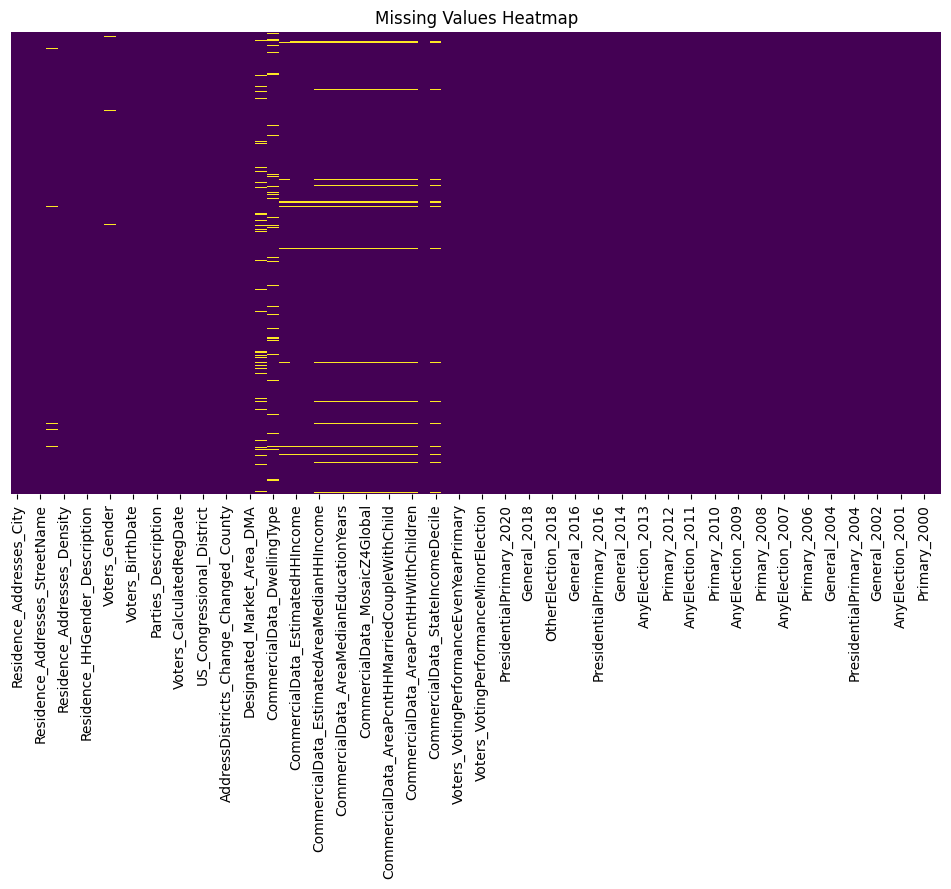

In [0]:
plt.figure(figsize=(12, 6)) #Visualize null values
sns.heatmap(df_clean.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')

> Following these these cleaning steps, we are left with 78 columns (and maintaining ~4 million entries). **Note:** As seen in the visualization above, some columns still contain missing values (i.e. Age, Gender, etc.), we'll overcome this when training our models through **imputation**. For numerical & categorical values, we'll use median and most frequent values respectively. As missing values account for less than 1% of the data, this should not hurt the reproducibility of our research findings and results on unseen data.

### Model Context 
For the purpose of our research, our group chose to use an XGBoost machine learning algorithm for our voter turnout classifier due to not only its ability to complex data, but also its interpretability. As we want to identify not just what are good/bad predictors of voter turnout but *how* they may affect that probability as well, the ability to derive **'Feature Importance'** and use **SHAP** plots will help remove the "black box" nature often associated with complex machine learning models.

**What are SHAP Values?** - SHAP (SHapley Additive exPlanations) values are a way to explain the output of our machine learning model. It uses a game theoretic approach that measures each voter's attribute contribution to the final outcome. In our examples shown later, each feature is assigned an importance value representing its contribution to the model's output. SHAP values show how each feature affects each final prediction, the significance of each feature compared to others, and the model's reliance on the interaction between features.

### Initial Model Implementation & Findings


In the following section, our group believes that one of the best predictors of voter turnout in a given election, is past participation in the democratic system. We'll confirm this in our initial model implementation below where we'll train the model on historical voter participation and a couple other variables to examine feature importance (we'll use the 2016 General election in this case as our target variable, with past Primary/General elections as predictors)

In [0]:
columns_for_model = ['Residence_Addresses_City', 'Residence_Addresses_Zip', 'Residence_Families_HHCount', 'Residence_HHParties_Description', 'Parties_Description', 'County', 'General_2016','PresidentialPrimary_2016', 'PresidentialPrimary_2012', 'General_2012', 'General_2008'] 
model_data = df_clean[columns_for_model].copy()

#convert categorical variables to numerical using OneHotEncoder
categorical_features = [
    'Residence_Addresses_City', 
    'Residence_Addresses_Zip',  
    'Residence_HHParties_Description', 
    'Parties_Description', 
    'County'
]
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
X = model_data.drop('General_2016', axis = 1)
y = model_data['General_2016']  #target variable
target_var = df_clean['General_2016'] #we'll reuse this throughout

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=3))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"model accuracy: {accuracy:.4f}")

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

model accuracy: 0.8315


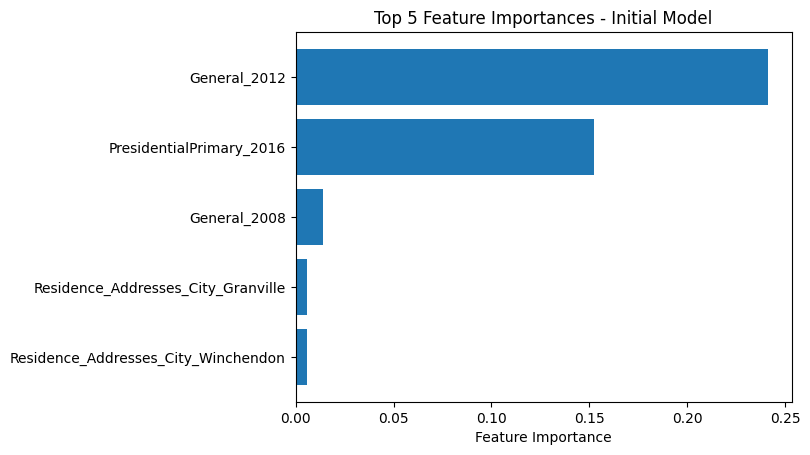

In [0]:
#feature importance viz here
importances = pipeline.named_steps['classifier'].feature_importances_

#gets feature names after one-hot encoding
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([cat_feature_names, 
                                   [col for col in X.columns if col not in categorical_features]])

sorted_idx = np.argsort(importances)[::-1][:5]  # Top 5 features
plt.barh(range(len(sorted_idx)), importances[sorted_idx][::-1])
plt.yticks(range(len(sorted_idx)), all_feature_names[sorted_idx][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 5 Feature Importances - Initial Model");

### Exploring Voting Disparities through Income/Age 
As we can see in the previous model, information on voter participation in recent elections is an important predictor for out models. As such, we'll include them to help our model make more accurate classifications, thus making our findings more reputable in turn. In the following section, we'll use those columns alongside a couple others (Gender, Age, Party, etc.) to act as our reference model to explore and answer our research questions. Here, we examine the disparities between income, age and voter outcome.


In [0]:
categorical_features = [
    'Voters_Gender', 'County', 'Parties_Description', 'General_2012', 'PresidentialPrimary_2016',
]
numerical_features = [
    'Voters_Age', 'CommercialData_EstimatedHHIncomeAmount',
    'Residence_Addresses_Density', 'CommercialData_AreaMedianEducationYears',
    'Residence_Families_HHCount'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),
        ('num', SimpleImputer(strategy='median'), numerical_features)
    ]
)

#model build
X = df_clean[categorical_features + numerical_features].copy()
y = df_clean['General_2016']  # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss', random_state=3))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"model accuracy: {accuracy:.4f}")

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

model accuracy: 0.8263


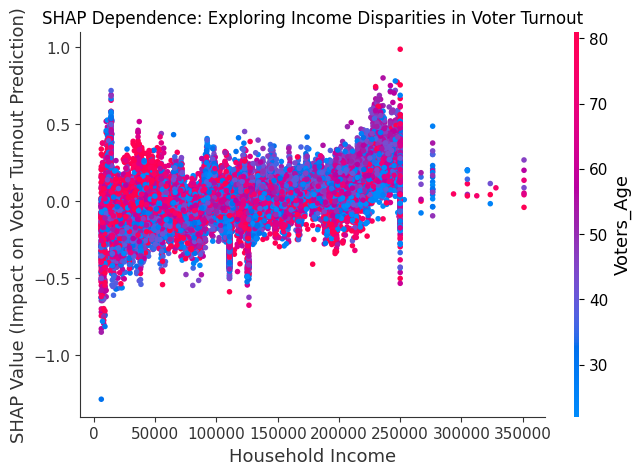

In [0]:
#SHAP dependence plot for income, colored by voter age
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([
    cat_feature_names, 
    numerical_features
])

explainer = shap.TreeExplainer(pipeline.named_steps['classifier'])
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)
shap_values = explainer.shap_values(X_test_transformed)
income_idx = np.where(all_feature_names == 'CommercialData_EstimatedHHIncomeAmount')[0][0]
age_idx = np.where(all_feature_names == 'Voters_Age')[0][0]

if hasattr(X_test_transformed, "toarray"):
    X_test_dense = X_test_transformed.toarray()
else:
    X_test_dense = X_test_transformed
shap.dependence_plot(
    income_idx, shap_values, X_test_dense, feature_names=all_feature_names, interaction_index=age_idx, show=False
)
# Adjust the axis labels of the most recent plot
plt.xlabel("Household Income")
plt.ylabel("SHAP Value (Impact on Voter Turnout Prediction)")
plt.title("SHAP Dependence: Exploring Income Disparities in Voter Turnout"), plt.show();

> **Result Interpretation**

>In our SHAP plot above (which displays the impact of age and income to the model's voter turnout prediction value where positive values mean the model is estimating a higher probability and vice versa), we see a couple interesting findings.
> - Non-Linear Impact of Income: Given our current restrictions and predictors, income shows a *weak* positive correlation with voter turnout in Massachusetts around the $0 - $150,000 range. The wide spread of SHAP values (from -0.5 to +0.5) suggests  that for these individuals, income alone is not a primary driver of the decision to vote. However, as individuals earn past this threshold, we see a sharp rise in SHAP values, suggesting that voting propensity is better at predicted through groups.
> - Critical Influence of Age: Age acts as a rather consistent secondary predictor that has an interesting reaction with income. Older voters (represented by the redder dots) consistently have higher SHAP values than younger voters (blue and purple dots) at *almost* every income level. A unique interaction occurs at the 50-100k income mark that shows older, lower-income voters are often predicted to be **less** likely to vote than a younger, middle-income voter, highlighting a key demographic insight that could be further explored.

> **Relevance to Data-Driven Campaigning**

> Our findings above allow strategists to move beyond braod generalizations (i.e. "we need to target young people") and can help answer campaign questions like:
> - "Where should we allocate our limited marketing budget for maximum impact amongst XYZ demographic such that it represents our biggest opportunity for mobilizing new voters?"

> Based on our results a campaign manager could make the decision to possibly:
> - Target Younger, Low-to-Middle Income Voters with a Digital/Social Media-Based Campaign
> - Shift Shift High-Income Voter Outreach from Mobilization to Persuasion (Party Alignment)
> - Conduct Further Research on Middle-Income Voters, Identifying untapped ethnic groups within the defined age/income range



## Exploring Gender & Political Affiliation Impact on Voter Propensity
In the following section, we'll create another visualization leveraging SHAP (SHapley Additive exPlanations) to explore the role of gender in voter turnout across various political parties. Ad our XGBoost model has shown to effectively classify voter turnout, we will continue to use this model

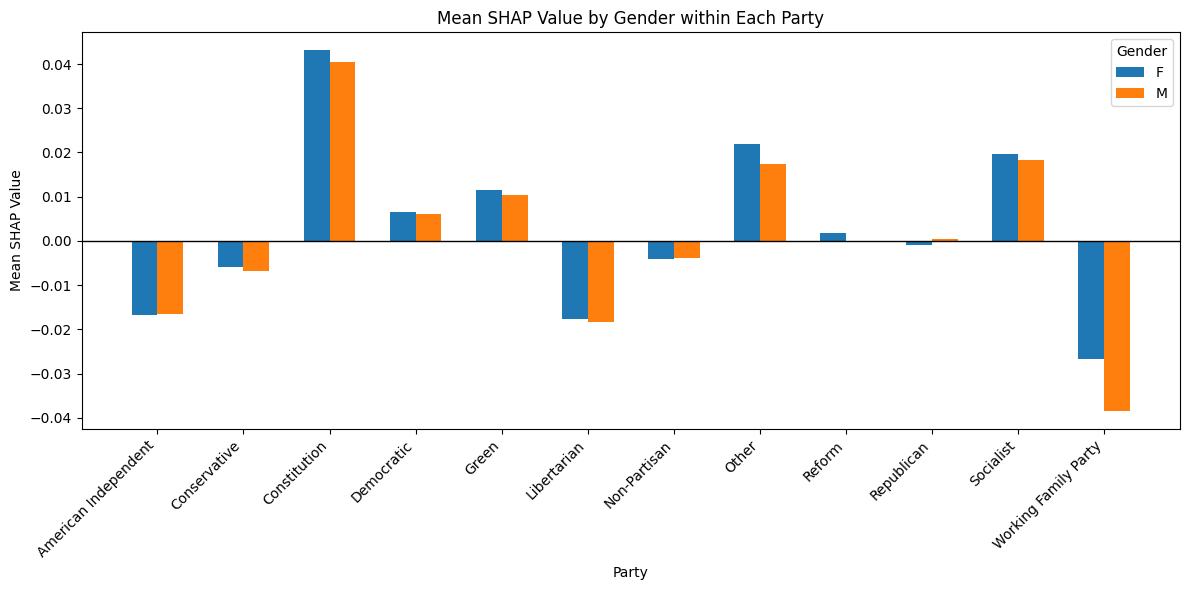

(<matplotlib.legend.Legend at 0x73fd5afc9010>, None, None)

In [0]:
party_col = 'Parties_Description'
gender_col = 'Voters_Gender'

ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
party_onehot_indices = [i for i, f in enumerate(cat_feature_names) if f.startswith('Parties_Description_')]

shap_df = pd.DataFrame({
    party_col: X_test[party_col].values,
    gender_col: X_test[gender_col].values,
    'mean_shap': shap_values[:, party_onehot_indices].mean(axis=1)
})

grouped = shap_df.groupby([party_col, gender_col])['mean_shap'].mean().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(grouped.index))
bar_width = 0.3
for i, gender in enumerate(grouped.columns):
    offset = (i - 0.5) * bar_width
    ax.bar(x + offset, grouped[gender], width=bar_width, label=gender)

ax.axhline(0, color='black', linewidth=1)
ax.set_xticks(x), ax.set_xticklabels(grouped.index, rotation=45, ha='right'), ax.set_xlabel('Party')
ax.set_ylabel('Mean SHAP Value'), ax.set_title('Mean SHAP Value by Gender within Each Party')
ax.legend(title='Gender'), plt.tight_layout(), plt.show()

> **Result Interpretation**

> In our SHAP plot above (which displays the intersection of gender and political party in voting propensity), we see a couple interesting findings. 
> - Party as a Rather Weak Indicator Overall (Given our scenario): First, as our model as many strong predictors like voter history, age, and so forth, we see that political affiliation and gender act as rather weak predictors for voter turnout **in this specific scenario** as training on different data may reveal more nuanced findings on a case by case basis. 
> - Major Parties are Weak Signals: For the two largest parties, affiliation alone presents average SHAP values near zero. However, two parties do stand out (Constitution & Working Family Party) which have significantly higher & lower voter turnout odds respectively

> **Relevance to Data-Driven Campaigning**

> Based on the analysis of voter party affiliation, a data-driven campaign can make highly specific, resource-efficient decisions. The results show that broad party labels like "Republican" or "Democratic" are surprisingly weak predictors of turnout on their own, meaning a campaign should not waste resources on generic party-line GOTV efforts. Instead, the model's findings allow for a "smarter" allocation of funds. For example, a campaign would decide to deprioritize mobilization spending on Constitution Party voters, as the model is already highly confident they will vote (highest positive SHAP value). Conversely, they would launch a targeted outreach campaign for Working Family Party and Libertarian voters, as the model identifies them as the least likely to turn out, representing the greatest opportunity for growth. Finally, recognizing that gender is not a significant differentiator in most parties, the campaign would avoid costly, gender-specific messaging (or dive deeper into the difference across maybe age brackets/income levels) justifying a more universal approach to its campaign content.